# Quantum “Hello World” + Quantum **1 + 1 = 2** (Qiskit) — Tweet‑Proof Demo

This notebook contains two **baseline** quantum-computing demos designed to be **shareable and debunk‑resistant**:

1. **Hello Quantum World** — Create a superposition with `H` and verify the ~50/50 measurement distribution using many shots.
2. **Quantum 1 + 1 = 2** — Implement a **reversible half-adder** using quantum gates (**CNOT** for XOR and **Toffoli/CCX** for AND), then verify **all 4 input cases**.

> ✅ **Important framing:** This notebook does **not** claim quantum advantage.  
> It demonstrates correctness and basic quantum behavior using standard quantum primitives.  
> Hardware noise is a separate step (and can be added later).

---

## Requirements
- `qiskit`
- `matplotlib`

If you’re running this locally, install with:
```bash
pip install qiskit matplotlib
```



In [2]:
# Imports
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# For saving images
from pathlib import Path

OUTPUT_DIR = Path("qc_demo_outputs")
OUTPUT_DIR.mkdir(exist_ok=True)

print("Output directory:", OUTPUT_DIR.resolve())

Output directory: D:\qdata\qiskit_dev_pop\QAC_practice_Learn\qc_tweet_proof_demo\qc_demo_outputs


## 1) Hello Quantum World

**Goal:** show the most minimal quantum behavior: superposition.

Circuit:
- Start in \(|0\rangle\)
- Apply **Hadamard** \(H\)
- Measure

Expected output: approximately **50% 0** and **50% 1** when repeated many times (shots).


=== Hello Quantum World Circuit (text) ===
     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 

Shots: 4096
Counts: {'1': 1978, '0': 2118}


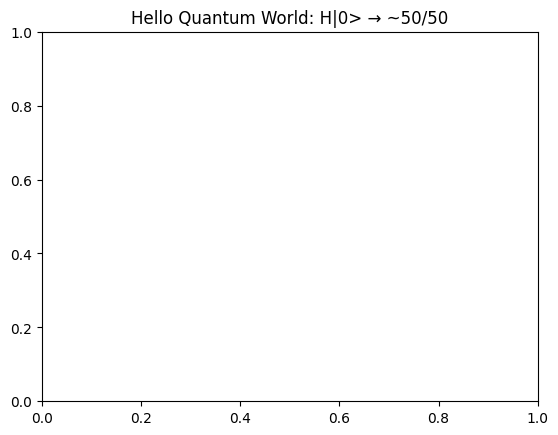

Saved histogram: qc_demo_outputs\hello_quantum_world_hist.png
Saved circuit: qc_demo_outputs\hello_quantum_world_circuit.png


In [4]:
# Hello Quantum World circuit
hello_qc = QuantumCircuit(1, 1)
hello_qc.h(0)
hello_qc.measure(0, 0)

print("=== Hello Quantum World Circuit (text) ===")
print(hello_qc.draw(output="text"))

# Run on simulator
# Run on simulator
backend = AerSimulator()
shots = 4096
hello_compiled = transpile(hello_qc, backend)
hello_result = backend.run(hello_compiled, shots=shots).result()
hello_counts = hello_result.get_counts()

print("\nShots:", shots)
print("Counts:", hello_counts)

# Plot and save histogram
fig = plot_histogram(hello_counts)
plt.title("Hello Quantum World: H|0> → ~50/50")
hello_hist_path = OUTPUT_DIR / "hello_quantum_world_hist.png"
plt.savefig(hello_hist_path, dpi=200, bbox_inches="tight")
plt.show()
print("Saved histogram:", hello_hist_path)

# Draw and save circuit diagram
hello_fig = hello_qc.draw(output="mpl")
hello_circ_path = OUTPUT_DIR / "hello_quantum_world_circuit.png"
hello_fig.savefig(hello_circ_path, dpi=200, bbox_inches="tight")
plt.close(hello_fig)
print("Saved circuit:", hello_circ_path)


## 2) Quantum “1 + 1 = 2” — Reversible Half Adder

We build a **half adder** using quantum gates:

- **SUM** = XOR = CNOT gates
- **CARRY** = AND = Toffoli (CCX) gate

Registers:
- `q0` = A  
- `q1` = B  
- `q2` = SUM  
- `q3` = CARRY  

Classical bits:
- `c0` = SUM  
- `c1` = CARRY  

So when A=1 and B=1:
- SUM = 0  
- CARRY = 1  
Measurement yields **CARRY SUM = 10₂**, which is **2₁₀**.


=== Half Adder Circuit (A=1, B=1) ===
     ┌───┐                     
q_0: ┤ X ├──■─────────■────────
     ├───┤  │         │        
q_1: ┤ X ├──┼────■────■────────
     └───┘┌─┴─┐┌─┴─┐  │  ┌─┐   
q_2: ─────┤ X ├┤ X ├──┼──┤M├───
          └───┘└───┘┌─┴─┐└╥┘┌─┐
q_3: ───────────────┤ X ├─╫─┤M├
                    └───┘ ║ └╥┘
c: 2/═════════════════════╩══╩═
                          0  1 

Shots: 4096
Counts: {'10': 4096}


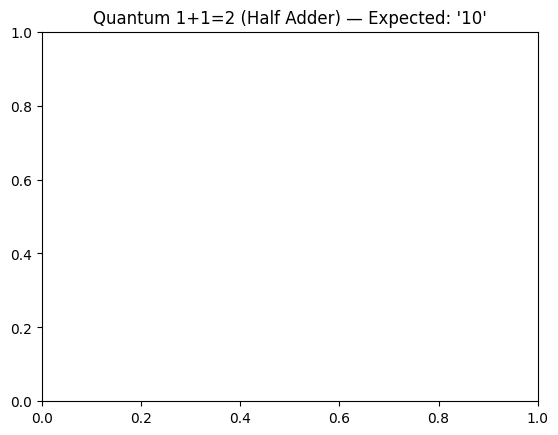

Saved histogram: qc_demo_outputs\half_adder_1_plus_1_hist.png
Saved circuit: qc_demo_outputs\half_adder_1_plus_1_circuit.png


In [6]:
def quantum_half_adder(a, b, shots=4096):
    """Return (circuit, counts) for a reversible half adder with inputs a,b in {0,1}."""
    qc = QuantumCircuit(4, 2)

    # Set inputs
    if a == 1:
        qc.x(0)
    if b == 1:
        qc.x(1)

    # SUM = A XOR B  (write into q2)
    qc.cx(0, 2)
    qc.cx(1, 2)

    # CARRY = A AND B (write into q3)
    qc.ccx(0, 1, 3)

    # Measure SUM -> c0, CARRY -> c1
    qc.measure(2, 0)
    qc.measure(3, 1)

    backend = AerSimulator()
    compiled = transpile(qc, backend)
    result = backend.run(compiled, shots=shots).result()
    counts = result.get_counts()

    return qc, counts


# Demo: 1 + 1
shots = 4096
adder_qc, adder_counts = quantum_half_adder(1, 1, shots=shots)

print("=== Half Adder Circuit (A=1, B=1) ===")
print(adder_qc.draw(output='text'))
print("\nShots:", shots)
print("Counts:", adder_counts)

# Plot + save histogram
fig = plot_histogram(adder_counts)
plt.title("Quantum 1+1=2 (Half Adder) — Expected: '10'")
adder_hist_path = OUTPUT_DIR / "half_adder_1_plus_1_hist.png"
plt.savefig(adder_hist_path, dpi=200, bbox_inches="tight")
plt.show()
print("Saved histogram:", adder_hist_path)

# Draw + save circuit
adder_fig = adder_qc.draw(output="mpl")
adder_circ_path = OUTPUT_DIR / "half_adder_1_plus_1_circuit.png"
adder_fig.savefig(adder_circ_path, dpi=200, bbox_inches="tight")
plt.close(adder_fig)
print("Saved circuit:", adder_circ_path)


## 3) Full Verification Test (Anti “Hardcoded Demo”)

To make this robust for public sharing, we run **all 4 inputs**:

| A | B | Expected (CARRY SUM) | Decimal |
|---|---|-----------------------|---------|
| 0 | 0 | 00 | 0 |
| 0 | 1 | 01 | 1 |
| 1 | 0 | 01 | 1 |
| 1 | 1 | 10 | 2 |

We use many shots and report:
- full counts (distribution)
- the most frequent outcome
- PASS/FAIL vs expected


In [7]:
expected = {
    (0, 0): "00",
    (0, 1): "01",
    (1, 0): "01",
    (1, 1): "10",
}

shots = 4096
results_table = []

print(f"=== Half Adder Full Test (shots={shots}) ===")
for a in [0, 1]:
    for b in [0, 1]:
        qc, counts = quantum_half_adder(a, b, shots=shots)
        best = max(counts, key=counts.get)
        exp = expected[(a, b)]
        passed = (best == exp)
        results_table.append((a, b, counts, best, exp, passed))
        print(f"A={a}, B={b} -> best={best} | expected={exp} | PASS={passed} | counts={counts}")

# Optional: create a simple PASS summary image for sharing
import pandas as pd

df = pd.DataFrame(
    [(a, b, best, exp, passed) for a, b, _, best, exp, passed in results_table],
    columns=["A", "B", "Most Frequent", "Expected", "PASS"],
)

df


=== Half Adder Full Test (shots=4096) ===
A=0, B=0 -> best=00 | expected=00 | PASS=True | counts={'00': 4096}
A=0, B=1 -> best=01 | expected=01 | PASS=True | counts={'01': 4096}
A=1, B=0 -> best=01 | expected=01 | PASS=True | counts={'01': 4096}
A=1, B=1 -> best=10 | expected=10 | PASS=True | counts={'10': 4096}


,A,B,Most Frequent,Expected,PASS
0,0,0,00,00,True
1,0,1,01,01,True
2,1,0,01,01,True
3,1,1,10,10,True


## 4) “Tweet-Ready” Text (Copy/Paste)

Below is a short thread you can paste into X/Twitter.  
(Adjust your personal tone as needed.)


In [8]:
tweet_thread = [
"Classic computing started with “Hello World” and “1+1=2”.\nHere’s the Quantum Computing equivalent using Qiskit:\n1) Hello Quantum World (superposition)\n2) Quantum 1+1=2 (reversible half-adder)\nVerified with 4096 shots each.",
"Hello Quantum World: create a superposition (|0⟩+|1⟩) using an H gate, then measure.\nExpected: ~50% 0 and ~50% 1 across many shots.\nThis is minimal quantum behavior: amplitudes before measurement.",
"Quantum 1+1=2: a reversible half-adder implemented with quantum gates.\nSUM = XOR (CNOT)\nCARRY = AND (Toffoli/CCX)\nFor A=1,B=1 → (CARRY,SUM)=10₂ → 2₁₀.",
"Anti “hardcoded demo”: we run all 4 inputs (00,01,10,11) and verify outputs match expected deterministic results in the simulator (confirmed statistically with shots).",
"Note: This does not claim quantum advantage. It’s a baseline correctness + behavior demo. Hardware noise is a separate step."
]

for i, t in enumerate(tweet_thread, 1):
    print(f"--- Tweet {i} ---\n{t}\n")


--- Tweet 1 ---
Classic computing started with “Hello World” and “1+1=2”.
Here’s the Quantum Computing equivalent using Qiskit:
1) Hello Quantum World (superposition)
2) Quantum 1+1=2 (reversible half-adder)
Verified with 4096 shots each.

--- Tweet 2 ---
Hello Quantum World: create a superposition (|0⟩+|1⟩) using an H gate, then measure.
Expected: ~50% 0 and ~50% 1 across many shots.
This is minimal quantum behavior: amplitudes before measurement.

--- Tweet 3 ---
Quantum 1+1=2: a reversible half-adder implemented with quantum gates.
SUM = XOR (CNOT)
CARRY = AND (Toffoli/CCX)
For A=1,B=1 → (CARRY,SUM)=10₂ → 2₁₀.

--- Tweet 4 ---
Anti “hardcoded demo”: we run all 4 inputs (00,01,10,11) and verify outputs match expected deterministic results in the simulator (confirmed statistically with shots).

--- Tweet 5 ---
Note: This does not claim quantum advantage. It’s a baseline correctness + behavior demo. Hardware noise is a separate step.

